In [435]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [436]:
questionNumber = int(input("Enter the question number"))

while questionNumber != 1 and questionNumber != 2 and questionNumber != 3 and questionNumber != 4 and questionNumber != 5:
    questionNumber = int(input("Invalid! Please enter an integer from 1 to 5 as question number"))
    

In [437]:
if questionNumber == 1:
    # Question 1
    p0 = 40 # million
    k = 0.25
    T = 10 # days

elif questionNumber == 2:
    # Question 2
    p0 = 100 # million
    k = -0.03
    T = 10 # days

elif(questionNumber == 3):
    # Question 3
    p0 = 1 # million
    M = 1000
    T = 5 # days
    r = 0.03

elif(questionNumber == 4):
    # Question 4
    p0 = 140 # million
    M = 3640
    T = 15 # days
    r = -0.04

elif(questionNumber == 5):
    # Question 5
    p0 = 5000 # million
    M = 30000
    T = 12 # days
    r = -0.06

In [438]:
def f(t, p):
    if(questionNumber == 1 or questionNumber == 2):
        # Question 1 & 2
        return k*p
    else:
        # Question 3, 4 & 5
        return r * p * (1 - p/M)

In [439]:
dt = 0.1
t = np.linspace(0, T, int(T/dt) + 1)

In [440]:
# Estimate by Euler's Forward Difference Method
P_euler = np.zeros(len(t))
P_euler[0] = p0

for i in range(1, len(t)):
    P_euler[i] = P_euler[i-1] + dt * f(t[i], P_euler[i-1])

In [441]:
# Estimate by Runge-Kutta Method
P_rk = np.zeros(len(t))
P_rk[0] = p0

for i in range(1, len(t)):
    k1 = f(t[i], P_rk[i-1])
    k2 = f(t[i], P_rk[i-1] + k1 * dt/2)
    k3 = f(t[i], P_rk[i-1] + k2 * dt/2)
    k4 = f(t[i], P_rk[i-1] + k3 * dt)
    P_rk[i] = P_rk[i-1] + (1/6) * dt * (k1 + 2*k2 + 2*k3 + k4)

In [442]:
# Actual
P_actual = np.zeros(len(t))
P_actual[0] = p0

def p(t):
    if(questionNumber == 1 or questionNumber == 2):
        # Question 1 & 2
        return p0 * np.exp(k * t)
    else:
        # Question 3, 4 & 5
        A = (M - p0)/p0
        return M/(1 + A * np.exp(-r * t))

for i in range(1, len(t)):
    P_actual[i] = p(t[i])

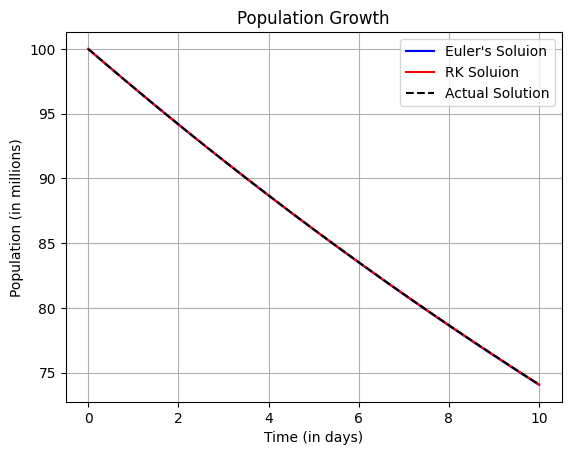

In [443]:
plt.plot(t, P_euler, label='Euler\'s Soluion', color='blue')
plt.plot(t, P_rk, label='RK Soluion', color='red')
plt.plot(t, P_actual, label='Actual Solution', color='black', linestyle='dashed')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('Population Growth')
plt.legend()
plt.grid()

plt.show()